# Common Setup

In [2]:
import numpy as np
import os

In [3]:
np.random.seed(42)

In [6]:
#Plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

In [7]:
# Save figures
PROJECT_ROOT_DIR="."
CHAPTER_ID="classification"

In [8]:
def save_fig(fig_id,tight_layout=True):
    path=os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving Figure", fig_id)
    if tight_layout:
        plt.tight_layout()
        plt.savefig(path,format='png',dpi=300)        

# MNIST

In [26]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target,i) for i, target in enumerate(mnist.target[:60000])]))[:,1]
    reorder_test = np.array(sorted([(target,i) for i, target in enumerate(mnist.target[60000:])]))[:,1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]    

In [27]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache = True)

In [28]:
mnist.target=mnist.target.astype(np.int8) #fetch openml() returns target as String
sort_by_target(mnist)
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [29]:
mnist.data.shape

(70000, 784)

In [30]:
X,y = mnist["data"],mnist["target"]
X.shape

(70000, 784)

In [31]:
y.shape

(70000,)

In [32]:
28*28

784

In [33]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

Saving Figure some_digit_plot


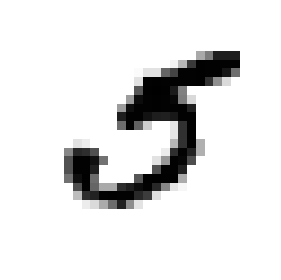

In [39]:
plt.imshow(some_digit_image, cmap=mpl.cm.binary,
          interpolation="nearest")
plt.axis("off")
save_fig("some_digit_plot")
plt.show()

In [40]:
y[36000]

5